# Import libraries and data frame

In [66]:
#importing libraries
import numpy as np
import pandas as pd
import os

In [67]:
#import merged dataframes 

path = r'/Users/gomula/Documents/Instacart Basket Analysis 14.05.2023'
df_prods_ords_merged = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Orders_products_merged.pkl'))

In [68]:
df_prods_ords_merged.shape

(32404859, 15)

In [69]:
#create a smaller subset of original data frame
df = df_prods_ords_merged[:1000000]

In [70]:
#define functions to sort price ranges
def price_label(row):
    if row['prices']<=5:
        return 'Low-range product'
    elif(row['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    elif row ['prices']>15:
        return 'High-range'
    else: return 'Not enough data'
    

In [71]:
#sort price range using user defined function
df['price_range'] = df.apply(price_label, axis = 1)

/var/folders/dt/7_bgdqv91h51_bntsn1zc9nm0000gn/T/ipykernel_22878/3814338558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis = 1)


In [72]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range
0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,77,7,9.0,both,Mid-range product
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product


In [73]:
df['price_range'].value_counts()

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

# Sort price ranges using.loc


In [74]:
df.loc[df['prices']>15, 'price_range_loc'] = 'High-range product'

/var/folders/dt/7_bgdqv91h51_bntsn1zc9nm0000gn/T/ipykernel_22878/1812425363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices']>15, 'price_range_loc'] = 'High-range product'


In [75]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid_range product'

In [76]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low_range product'

In [77]:
df['price_range_loc'].value_counts()

Mid_range product    756450
Low_range product    243550
Name: price_range_loc, dtype: int64

# Sort the price ranges using .loc for the whole data frame

In [78]:
df_prods_ords_merged.loc[df_prods_ords_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [79]:
df_prods_ords_merged.loc[(df_prods_ords_merged['prices'] <= 15) & (df_prods_ords_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [80]:
df_prods_ords_merged.loc[df_prods_ords_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [81]:
# count the price ranges in the data frame
df_prods_ords_merged['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

In [82]:
df_prods_ords_merged['order_dow'].value_counts()


0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_dow, dtype: int64

# Define new variable for loop

In [83]:
# define new variable 'busiest day' using for loop
result = []

for value in df_prods_ords_merged['order_dow']:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [84]:
len(result)

32404859

In [85]:
df_prods_ords_merged['busiest_day'] =result
df_prods_ords_merged['busiest_day'].value_counts()

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

# Task Steps

In [86]:
# step 2: creating new variable 'busiest days'
result2 = []

for value in df_prods_ords_merged['order_dow']:
  if value in [0,1]:
    result2.append("Busiest days")
  elif value in [3,4]:
    result2.append("Slowest days")
  else:
    result2.append("Regularly busy")


In [87]:
len(result2)

32404859

In [88]:
df_prods_ords_merged['busiest_days'] = result2
df_prods_ords_merged['busiest_days'].value_counts()

Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: busiest_days, dtype: int64

In [89]:
6204182 + 5660230 

11864412

In [90]:
3840534 + 3783802

7624336

In [91]:
###### Step 3: The summation of days 0 & 1 as the busiest days is (6204182 + 5660230 = 11864412) which is in agreement with busiest days. And the same is true for days 3 & 4 as slowest days (3840534 + 3783802 = 7624336) which is the same as the number of slowest days.

In [92]:
# Step 4: determine the busiest hours of the day
df_time = df_prods_ords_merged['order_hour_of_day'].value_counts()
df_time

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

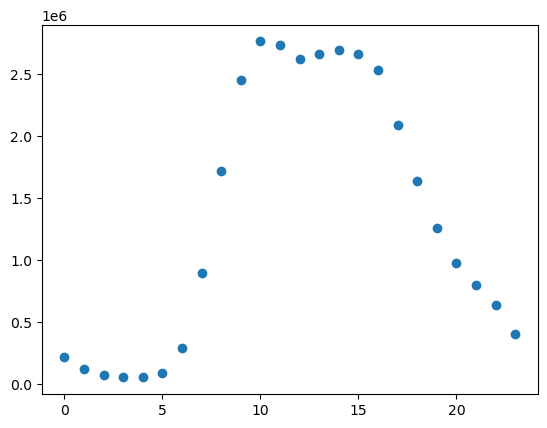

In [93]:
time = list(df_time.index)
frequency = list(df_time)
import matplotlib.pyplot as plt
plt.plot(time, frequency, 'o')

# According to the plot of order frequency in hour of the day, we can suggest 9 to 16 as the 'Most orders', 0 to 6 as 'Fewest orders' and the rest as 'Average orders'.

In [94]:
# define variable “busiest_period_of_day”

result3 = []

for value in df_prods_ords_merged['order_hour_of_day']:
  if value>=9 and value<=16:
    result3.append("Most orders")
  elif value<=6:
    result3.append("Fewest orders")
  else:
    result3.append("Average orders")

In [95]:
df_prods_ords_merged['busiest_period_of_day'] = result3
df_prods_ords_merged['busiest_period_of_day'].value_counts()

Most orders       21118071
Average orders    10399967
Fewest orders       886821
Name: busiest_period_of_day, dtype: int64

In [96]:
df_prods_ords_merged.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged_ver2.pkl'))